# Making bets in a burning house
## Helping gamblers overcome their addiction with facts

![banner](https://static.scientificamerican.com/sciam/cache/file/93B548A8-F834-42F8-8ACDF24B8FE13251.jpg)

## Abstract

Gambling can easily become a destructive addiction on anyone's life. In this project, we are comissioned with the calculations of the odds for winning lottery tickets with varying quantity and size of tickets and prizes. Our focus is to provide addicts with factual information on the low odds of the game, hoping this might deterthem from betting.

The main findings are as follows:

* What are the chances of winning the big prize with a single ticket? 7.15e-06%, or 1 in 13,983,816

* What are the chances of winning the big prize with more numbers on a ticket? 
1. 1 ticket of 7 numbers: 5e-05%, or 1 in 1,997,688;
2. 1 tickets of 8 numbers:  0.0002%, or 1 in 499,422;
3. 1 tickets of 14 numbers: 0.0215%, or 1 in 4,657;
4. 1 tickets of 25 numbers: 1.27%, or 1 in 79.

* What are the chances of winning the big prize playing multiple different tickets?
1. 10,000 tickets of 6 numbers: 0.0715%, or 1 in 1,398;
2. 10000 tickets of 7 numbers each: 0.5%, or 1 in 200;
3. 1,000,000 tickets of 6 numbers each: 7.15%, or 1 in 14;
4. 1,000,000 tickets of 7 numbers each: 50.1%, or 1 in 2;
5. 6,991,908 tickets of 6 numbers each: 50.0%, or 1 in 2;

* What are the chances of winning secondary prizes on a single ticket?
1. For 2 matches in a ticket with 6 numbers, your chance to win is 13.237802900152577%, or 1 in 8
2. For 3 matches in a ticket with 6 numbers, your chance to win is 1.7650403866870101%, or 1 in 57
3. For 4 matches in a ticket with 6 numbers, your chance to win is 0.0968619724401408%, or 1 in 1,032
4. For 5 matches in a ticket with 6 numbers, your chance to win is 0.0018449899512407771%, or 1 in 54,201

* What are the chances of winning secondary prizes with more numbers on a ticket?
0. For 2 matches in a ticket with 14 numbers, your chance to win is 34.07338883749615%, or 1 in 3
1. For 2 matches in a ticket with 7 numbers, your chance to win is 16.808931124379782%, or 1 in 6
2. For 3 matches in a ticket with 7 numbers, your chance to win is 2.87332155972304%, or 1 in 35
3. For 4 matches in a ticket with 7 numbers, your chance to win is 0.215499116979228%, or 1 in 464
4. For 5 matches in a ticket with 7 numbers, your chance to win is 0.006307291228660332%, or 1 in 15,855

## Table of Contents

1. [**Introduction**](#section1)
2. [**Goals and limitations**](#section2)
3. [**Methodology**](#section3)
4. [**Metadata**](#section4)
5. [**Data Exploration and Transformation**](#section5)      
6. [**Data Visualization and Analysis**](#section6)
7. [**Conclusion**](#section7)

## 1. Introduction<a name="section1"></a>

Life can be a hard, long path in most of its facets, but many are on the look for shortcuts and easy times. Gambling is one of the most destructive addictions out there, but still glorified by media and culture in movies, tv programs and even sport channels. Most start out gambling for fun, but that can quickly escalate into addiction. As all chemical dependents, lottery addicts soon begin spending from savings and loans, accumulate debts, and in no time are becoming desperate and stealing.

A fictitious medical institute embraced the task of trying to help these patients with an app that would calculate their winning chances, and designated me to develop the logical core of their application. In its first version, we are to focus on the [6/49](https://en.wikipedia.org/wiki/Lotto_6/49) lottery and design functions that empower useres to address their main issues when gambling -  in this game, one is supposed to pick 6 numbers out of 49. The doctors heading the intitute also want us to consider [historical data](https://www.kaggle.com/datascienceai/lottery-dataset) from the national 6/49 lottery game in Canada. There is data for 3665 drawings, from 1982 to 2018.


## 2. Goals and limitations<a name="section2"></a>

We'll design functions to respond to the main issues at hand:

* What are the chances of winning the big prize with a single ticket?
* What are the chances of winning the big prize with more numbers on a ticket?
* What are the chances of winning the big prize playing multiple different tickets?
* What are the chances of winning secondary prizes on a single ticket?
* What are the chances of winning secondary prizes with more numbers on a ticket?
* Check if the current ticket has ever won the lottery in past drawings.
* Check if betting is a good deal by comparing the sum of probabilities of all tickets we could buy with the prize

Limitations:
1. The lottery we analyze does not account for an extra ball (powerball). However, all it would take would be to multiply the desired winning numbers' probability by the probability of that extra ball (1/43 in this '6 to 49' case) - given it is drawn from the same poll of balls;
2. The lottery prize varies and we picked the latest values for ticket and prize (24/6/2023) as a reference. The largest 6/49 jackpot was in Oct/2015 for CAN 64 million, and the second largest was CAN 63.4 million in Apr/2013. When the ticket would cost CAN 1, the largest jackpot ever was CAN 26 millions;

## 3. Methodology<a name="section3"></a>

We deploy pandas to extract and clean the dataset from the csv file.

We'll build probability functions - combinations, permutations- in Python to calculate the odds for different ticket sizes and different winning numbers, returning the values of interest to the engineering team on the app.

## 4. Metadata<a name="section4"></a>

The data obtained from kaggle has no metadata on its content, but the columns are simple:
product': the name of the lottery;
* 'draw_number': the number of the contest in the history of the lottery. There were days with more than 1 draw, and the differentiator is the next column.
* 'sequence_number': the daily draw number, starting at 0, reaching up to 3.
* 'draw_date': date of the draw;
* 'number_drawn_n': the n-th numbered drawn, from 1-6. In the data, these columns are sorted in ascending order
* 'bonus_number': if there was a bonus number, and its value (the bonus number was drawn from the same pool as the regular 6 numbers)


## 5. Data Exploration<a name="section5"></a>
0. define functions
1. Check for datatype
2. Missing/duplicated values
3. Unwanted columns/rows

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

lottery = pd.read_csv('649.csv')

In [2]:
#0. Define functions:
def factorial(n):
    final=1
    while n>0:
        final*=n
        n-=1
    return final

def combinations(n,k):
    return factorial(n)/(factorial(n-k)*factorial(k))



In [3]:
print(factorial(5))
print(combinations(6,5))


120
6.0


In the functions above, we define factorial for a given number n and combinations for a given number n, grouped by k.

In [4]:
#1. Check for datatype
lottery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PRODUCT          3665 non-null   int64 
 1   DRAW NUMBER      3665 non-null   int64 
 2   SEQUENCE NUMBER  3665 non-null   int64 
 3   DRAW DATE        3665 non-null   object
 4   NUMBER DRAWN 1   3665 non-null   int64 
 5   NUMBER DRAWN 2   3665 non-null   int64 
 6   NUMBER DRAWN 3   3665 non-null   int64 
 7   NUMBER DRAWN 4   3665 non-null   int64 
 8   NUMBER DRAWN 5   3665 non-null   int64 
 9   NUMBER DRAWN 6   3665 non-null   int64 
 10  BONUS NUMBER     3665 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 315.1+ KB


When it comes to data types, draw date should be in datetime objects, column headers should be low key, and the 'product' column seems useless, but we'll keep it for now.

In [5]:
lottery_up = lottery.copy()
lottery_up.columns = lottery_up.columns.str.lower().str.replace(' ', '_').str.strip()
lottery_up.columns

Index(['product', 'draw_number', 'sequence_number', 'draw_date',
       'number_drawn_1', 'number_drawn_2', 'number_drawn_3', 'number_drawn_4',
       'number_drawn_5', 'number_drawn_6', 'bonus_number'],
      dtype='object')

In [6]:
#1. Check for datatype
lottery_up2 = lottery_up.copy()
lottery_up2['draw_date'] = pd.to_datetime(lottery_up2['draw_date'], infer_datetime_format=True)

In [7]:
#1. Check for datatype
lottery_up2.describe(include='all', datetime_is_numeric=True)

,product,draw_number,sequence_number,draw_date,number_drawn_1,number_drawn_2,number_drawn_3,number_drawn_4,number_drawn_5,number_drawn_6,bonus_number
count,3665.0,3665.000000,3665.000000,3665,3665.000000,3665.000000,3665.000000,3665.000000,3665.000000,3665.000000,3665.000000
mean,649.0,1819.494952,0.030832,2001-06-14 18:03:14.488403840,7.327694,14.568076,21.890859,28.978445,36.162619,43.099045,24.599454
min,649.0,1.000000,0.000000,1982-06-12 00:00:00,1.000000,2.000000,3.000000,4.000000,11.000000,13.000000,0.000000
25%,649.0,917.000000,0.000000,1992-11-04 00:00:00,3.000000,9.000000,16.000000,23.000000,31.000000,40.000000,12.000000
50%,649.0,1833.000000,0.000000,2001-08-15 00:00:00,6.000000,14.000000,22.000000,30.000000,37.000000,45.000000,25.000000
75%,649.0,2749.000000,0.000000,2010-05-26 00:00:00,10.000000,20.000000,28.000000,35.000000,42.000000,47.000000,37.000000
max,649.0,3591.000000,3.000000,2018-06-20 00:00:00,38.000000,43.000000,45.000000,47.000000,48.000000,49.000000,49.000000
std,0.0,1039.239544,0.237984,NaN,5.811669,7.556939,8.170073,8.069724,7.190960,5.506424,14.360038


Is it reasonable that  the maximum value the first draw number ever got is 38, out of 49 possible values? Or are the draw numbers sorted according to their values in each draw, not necessarily in their draw order? This would also explain the minimum for each drawing number being in ascending order as well. The minimum bonus number being 0 must indicate that it was not always drawn, since the lottery numbers range from 1-49.

There are 3591 draw numbers, reflecting the amount of unique dates for drawing in the history of 649. There are probably days with more than one drawing, let's just make sure of it. In this case, it would make sense that 'sequence_number' column would stand for how many drawings took place at a given date. This suspicion is reinforced by the most frequent draw_date at 4 counts (0-3)

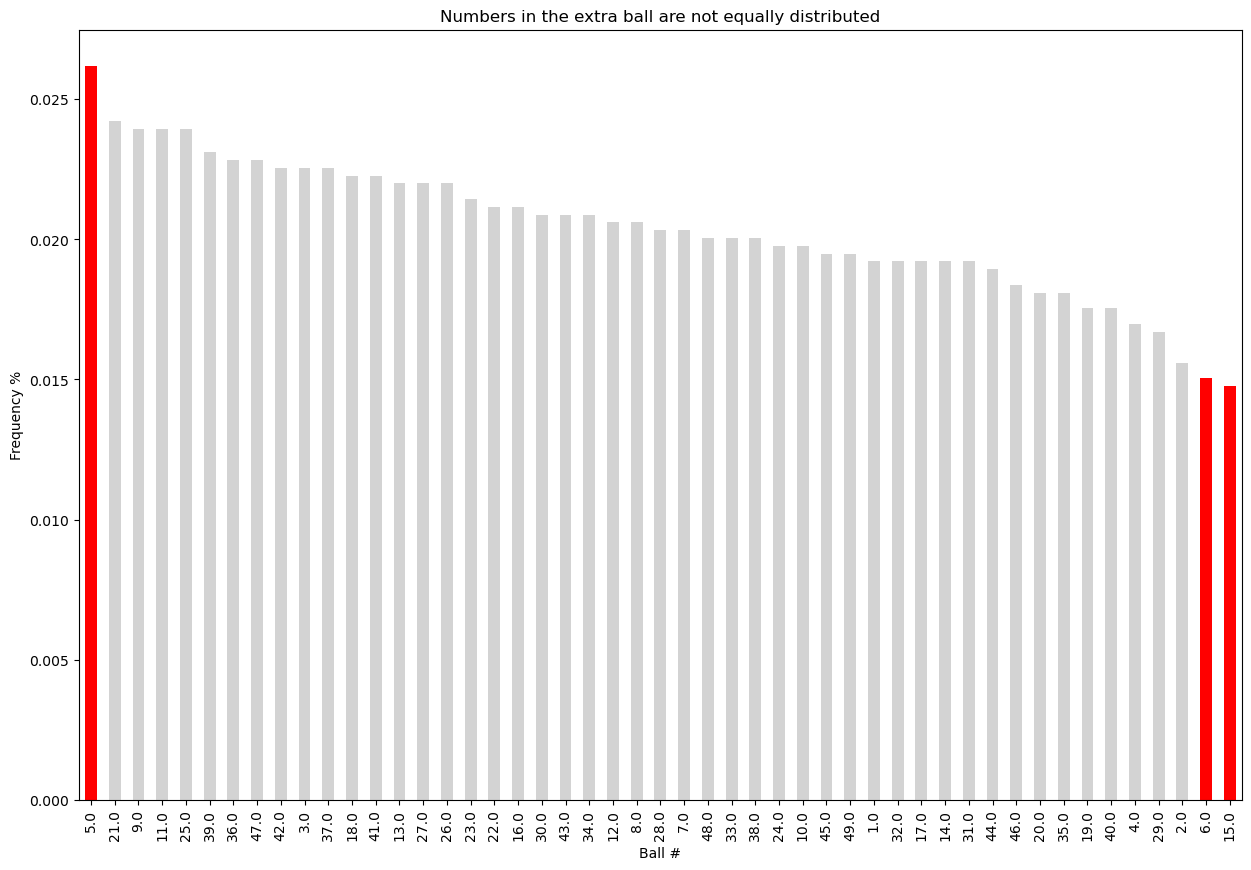

In [8]:
#reasonableness: there was no number 0 drawn: it means there was no extra number then
lottery_up3 = lottery_up2.copy()
lottery_up3.loc[:,'bonus_number'].replace({0:np.nan}, inplace=True)
lottery_up3.loc[:, 'bonus_number'].value_counts(dropna=True, normalize=True).plot(kind='bar', figsize=(15,10),
color=['r', 'lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray',
       'lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray',
    'lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray',
    'lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray',
    'lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray',
    'lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray',
    'lightgray','lightgray','lightgray','lightgray','r','r'])
plt.title('Numbers in the extra ball are not equally distributed')
plt.ylabel('Frequency %')
plt.xlabel('Ball #')
plt.show()

Interesting to observe how number 5 has been drawn 2.5% of the time, whereas  6, 15 are preent 1.6% of times.

In [9]:
#2. Missing/duplicated values
lottery_up3[lottery_up3.duplicated()]

,product,draw_number,sequence_number,draw_date,number_drawn_1,number_drawn_2,number_drawn_3,number_drawn_4,number_drawn_5,number_drawn_6,bonus_number


So there are no duplicated entries in the dataset. These repetitions are probably multiple drawings at the same day.

In [10]:
#2. Missing/duplicated values
rep_dates = list(lottery_up3[lottery_up3['draw_date'].duplicated()]['draw_date'].unique())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(lottery_up3[lottery_up3['draw_date'].isin(rep_dates)])

,product,draw_number,sequence_number,draw_date,number_drawn_1,number_drawn_2,number_drawn_3,number_drawn_4,number_drawn_5,number_drawn_6,bonus_number
2889,649,2890,0,2011-10-01,8,15,24,25,30,35,13.0
2890,649,2890,1,2011-10-01,12,19,22,26,44,47,NaN
2891,649,2891,0,2011-10-05,7,10,13,19,26,29,23.0
2892,649,2891,1,2011-10-05,7,11,12,16,30,41,NaN
2893,649,2892,0,2011-10-08,7,13,14,16,22,48,32.0
2894,649,2892,1,2011-10-08,9,23,29,42,43,47,NaN
2895,649,2893,0,2011-10-12,6,7,12,20,38,40,43.0
2896,649,2893,1,2011-10-12,10,15,16,18,23,26,NaN
2897,649,2894,0,2011-10-15,14,24,27,36,39,42,3.0
2898,649,2894,1,2011-10-15,4,13,15,20,26,41,NaN


Confirming our expectations, the sequence number tells us whether it is the first draw of the day. Draws on the same day hold the same draw_number. Another confirmation is that the draw numbers are ordered, thus the ascending limits of their range. It is curious to observe that there is no 'extra number' for drawings other than the first of each day.  

Text(0.5, 23.38159722222222, 'Columns')

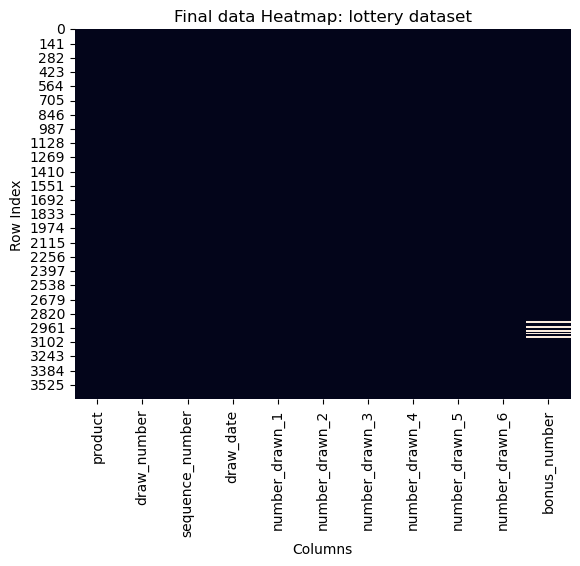

In [11]:
#2. Missing/duplicated values
sns.heatmap(lottery_up3.isnull(), cbar=False)
plt.title('Final data Heatmap: lottery dataset')
plt.ylabel('Row Index')
plt.xlabel('Columns')

## 6. Data Manipulation and Analysis<a name="section6"></a>


First, we build a function for estimating the chances of winning given a ticket input as a list. Our function is able to calculate even if the ticket has more than 6 values, which is the case with many lotteries. These are, of course, proportionately (at least) more expensive to buy.

In [12]:
def one_ticket_probability(ls):
    if len(ls)<6|len(ls)>49:
        print(f'You have an invalid ticket')
        return
    for i in ls:
        if (i>49)|(i<1)|(isinstance(i,float))|len(ls)!=(len(set(ls))):
            print(f'''Your ticket {ls} either: 
            1. contains numbers out of the lottery range of integers (1-49);
            2. contains repeated numbers ''')
            return
    total_outcomes = combinations(49,6)
    successful_outcomes = combinations(len(ls), 6)
    chance = successful_outcomes/total_outcomes
    print(f"With ticket {ls}, your chance to score 6 digits is {chance*100}%, or 1 in {round(1/chance):,}")
    return chance

In [13]:
one_ticket_probability([1,2,3,4,5,6])
one_ticket_probability([1,2,3,4,5,5])
one_ticket_probability([1,2,3,4,5])
one_ticket_probability([1,2,3,4,5, 6.5])
one_ticket_probability([1,2,3,4,5,6,7])

With ticket [1, 2, 3, 4, 5, 6], your chance to score 6 digits is 7.151123842018516e-06%, or 1 in 13,983,816
Your ticket [1, 2, 3, 4, 5, 5] either: 
            1. contains numbers out of the lottery range of integers (1-49);
            2. contains repeated numbers 
With ticket [1, 2, 3, 4, 5], your chance to score 6 digits is 1.1918539736697527e-06%, or 1 in 83,902,896
Your ticket [1, 2, 3, 4, 5, 6.5] either: 
            1. contains numbers out of the lottery range of integers (1-49);
            2. contains repeated numbers 
With ticket [1, 2, 3, 4, 5, 6, 7], your chance to score 6 digits is 5.005786689412961e-05%, or 1 in 1,997,688


5.005786689412961e-07

Next, we build a function to compare all drawings from the historic dataset to any given ticket that is input as an unordered list. We return the historical check along with the probability of winning the next draw (considering the numbers are unibiased).

In [14]:
def extract_numbers(row):
    total_draw=[]
    cols = ['number_drawn_1','number_drawn_2','number_drawn_3','number_drawn_4','number_drawn_5','number_drawn_6']
    for c in cols:
         total_draw.append(row[c])
    return set(total_draw)        
            
draw_arr = lottery_up3.apply(extract_numbers, axis=1)
draw_arr.name='sets'

def check_hitorical_occurence(ls, ser):
    ticket = set(sorted(ls))
    result = ser.apply(lambda x: x.issubset(ticket))
    print(f'Your ticket {ls} would have won {sum(result)} times in the history of the lottery.')
    one_ticket_probability(ls)
    
check_hitorical_occurence([1,3,5,7,9,11], draw_arr)
print('---')
check_hitorical_occurence([28,38,39,43,45,48], draw_arr)
print('---')
check_hitorical_occurence([28,38,39,43,45,48, 49], draw_arr)

Your ticket [1, 3, 5, 7, 9, 11] would have won 0 times in the history of the lottery.
With ticket [1, 3, 5, 7, 9, 11], your chance to score 6 digits is 7.151123842018516e-06%, or 1 in 13,983,816
---
Your ticket [28, 38, 39, 43, 45, 48] would have won 1 times in the history of the lottery.
With ticket [28, 38, 39, 43, 45, 48], your chance to score 6 digits is 7.151123842018516e-06%, or 1 in 13,983,816
---
Your ticket [28, 38, 39, 43, 45, 48, 49] would have won 1 times in the history of the lottery.
With ticket [28, 38, 39, 43, 45, 48, 49], your chance to score 6 digits is 5.005786689412961e-05%, or 1 in 1,997,688


The following step is to build a function which calculates the probabilities of multiple, size-varying tickets combined hitting the jackpot.

In [15]:
def one_ticket_probability_mute(ls):
    for i in ls:
        if (i>49)|(i<1)|(isinstance(i,float)):
            print(f'Your ticket {ls} contains numbers out of the lottery range of integers (1-49)')
            return
    total_outcomes = combinations(49,6)
    successful_outcomes = combinations(len(ls), 6)
    chance = successful_outcomes/total_outcomes
    return chance

def one_ticket_probability_len(n):
    if (n>49)|(n<6)|(isinstance(n,float)):
            print(f'Your ticket length {n} is out of the expected range of integers (6-49)')
            return
    total_outcomes = combinations(49,6)
    successful_outcomes = combinations(n, 6)
    chance = successful_outcomes/total_outcomes
#     print(f" With ticket {ls}, your chance to score 6 digits is {chance*100}%, or 1 in {round(1/chance):,}")
    return chance

def multi_ticket_probability(ls_num_len_tickets):
    total_outcomes = combinations(49,6)
    total_combinations_n = total_outcomes/combinations(ls_num_len_tickets[1],6)
    if ((ls_num_len_tickets[0])>13983816)|((ls_num_len_tickets[0])<1)|(isinstance((ls_num_len_tickets[0]),float))|((ls_num_len_tickets[1])<6)|((ls_num_len_tickets[1])>49):
        print(f'Your number of tickets or their length {ls_num_len_tickets} is not within the reasonable range of integers expected (1: 13,983,816)  and (6:49) respectively')
        return
    elif ls_num_len_tickets[0]>total_combinations_n:
        print(f'''You are inputting more tickets {ls_num_len_tickets[0]:,} 
        than the total possibilities of combinations {total_combinations_n}
        given {ls_num_len_tickets[1]} numbers per ticket''' )
        return    
    chances=ls_num_len_tickets[0]*one_ticket_probability_len(ls_num_len_tickets[1])
    print(f" With {ls_num_len_tickets[0]:,} tickets of {ls_num_len_tickets[1]} numbers each , your chance to win is {chances*100}%, or 1 in {round(1/chances):,}")

In [16]:
# # multi_ticket_probability(-1)
# multi_ticket_probability(139838160)
for i in [[1,6], [1,7], [1,8], [1,14], [1,25], [10,6], [10,7], [100,6], [100,7], [10000,6], [10000,7], [1000000,6], [1000000,7], [6991908,6], [ 1997688,7], [6991908,7], [13983816,6] ]:
    multi_ticket_probability(i)
    print('---')
   

 With 1 tickets of 6 numbers each , your chance to win is 7.151123842018516e-06%, or 1 in 13,983,816
---
 With 1 tickets of 7 numbers each , your chance to win is 5.005786689412961e-05%, or 1 in 1,997,688
---
 With 1 tickets of 8 numbers each , your chance to win is 0.00020023146757651845%, or 1 in 499,422
---
 With 1 tickets of 14 numbers each , your chance to win is 0.021474824897581606%, or 1 in 4,657
---
 With 1 tickets of 25 numbers each , your chance to win is 1.266464032421479%, or 1 in 79
---
 With 10 tickets of 6 numbers each , your chance to win is 7.151123842018517e-05%, or 1 in 1,398,382
---
 With 10 tickets of 7 numbers each , your chance to win is 0.000500578668941296%, or 1 in 199,769
---
 With 100 tickets of 6 numbers each , your chance to win is 0.0007151123842018516%, or 1 in 139,838
---
 With 100 tickets of 7 numbers each , your chance to win is 0.0050057866894129615%, or 1 in 19,977
---
 With 10,000 tickets of 6 numbers each , your chance to win is 0.071511238420185

This function simply builds on top of the previous 'one_ticket_probability' and returns the winning chances in percentage and unit ratio for different ticket sizes and amounts. This will provide information for the user who thinks that buying more will fix his odds, thus aiming to prevent the addiction cycle.

### Less winning numbers

We were also asked to calculate the probability of having a winning ticket for less matches: exactly 2,3,4, and 5 numbers. Inside the app, we are to create a function that takes in the n-numbered ticket and the number of matches, from 2 to 5, and returns the probability of winning with exactly those matches. The probability of winning with less numbers is: (1) the number of ways to select the winning numbers multiplied by (2) the number of ways to select the losing numbers divided by (3) the number of total possible combinations.

In [17]:
def probability_less_6(ticket, matches):
    if (matches<2)|(matches>5):
        print(f'Your number of matches {matches} is not within the reasonable range of integers expected (2: 5)')
        return
    if len(ticket)<6:
        print(f'Your ticket {ticket} has less than 6 digits')
        return
    comb_winning_nums = combinations(len(ticket),matches)
    comb_losing_nums = combinations((49-len(ticket)), 6-matches)
    total_successful = comb_winning_nums*comb_losing_nums
    possible_outcomes = combinations(49,6)
    result = total_successful/possible_outcomes    
    print(f" For {matches} matches in a ticket with {len(ticket)} numbers, your chance to win is {result*100}%, or 1 in {round(possible_outcomes/total_successful):,}")
    return result


probability_less_6([1,2,3,4,5,6], 1)
print('---')
probability_less_6([1,2,3,4,5,6], 2)
print('---')
probability_less_6([1,2,3,4,5,6], 3)
print('---')
probability_less_6([1,2,3,4,5,6], 4)
print('---')
probability_less_6([1,2,3,4,5,6], 5)
print('---')
probability_less_6([1,2,3,4,5,6,7], 5)
print('---')
probability_less_6([1,2,3,4,5,6,7], 4)
print('---')
probability_less_6([1,2,3,4,5,6,7], 3)
print('---')
probability_less_6([1,2,3,4,5,6,7], 2)
print('---')
probability_less_6([1,2,3,4,5,6,7,8,9,10,11,12,13,14], 2)
print('---')

Your number of matches 1 is not within the reasonable range of integers expected (2: 5)
---
 For 2 matches in a ticket with 6 numbers, your chance to win is 13.237802900152577%, or 1 in 8
---
 For 3 matches in a ticket with 6 numbers, your chance to win is 1.7650403866870101%, or 1 in 57
---
 For 4 matches in a ticket with 6 numbers, your chance to win is 0.0968619724401408%, or 1 in 1,032
---
 For 5 matches in a ticket with 6 numbers, your chance to win is 0.0018449899512407771%, or 1 in 54,201
---
 For 5 matches in a ticket with 7 numbers, your chance to win is 0.006307291228660332%, or 1 in 15,855
---
 For 4 matches in a ticket with 7 numbers, your chance to win is 0.215499116979228%, or 1 in 464
---
 For 3 matches in a ticket with 7 numbers, your chance to win is 2.87332155972304%, or 1 in 35
---
 For 2 matches in a ticket with 7 numbers, your chance to win is 16.808931124379782%, or 1 in 6
---
 For 2 matches in a ticket with 14 numbers, your chance to win is 34.07338883749615%, or

Now, we can calculate the chances of scoring at least those less numbers. The math behind the formula is simple, being the sum of all exact numbers equal or higher. For example: the chances of scoring at least 3 numbers is equal to the sum of chances of scoring exactly 3, chances of scoring exactly 4, chances of scoring exactly 5 and chances of scoring exactly 6 numbers.

In [18]:
def probability_less_6_mute(ticket, matches):
    if (matches<2)|(matches>5):
        print(f'Your number of matches {matches} is not within the reasonable range of integers expected (2: 5)')
        return
    if len(ticket)<6:
        print(f'Your ticket {ticket} has less than 6 digits')
        return
    comb_winning_nums = combinations(len(ticket),matches)
    comb_losing_nums = combinations((49-len(ticket)), 6-matches)
    total_successful = comb_winning_nums*comb_losing_nums
    possible_outcomes = combinations(49,6)
    result = total_successful/possible_outcomes 
    return result


def probability_n_or_more(ticket, matches):
    total_successful=0
    for i in range(matches, 6):
        probability_less_6(ticket,i)
        total_successful+=probability_less_6_mute(ticket, i)
        i+=1
    one_ticket_probability(ticket)
    total_successful+=one_ticket_probability_mute(ticket)    
    print(f'The probability of scoring at least {matches} numbers with ticket with {len(ticket)} numbers is {total_successful*100}%, or 1 in {round(1/total_successful):,}')

In [19]:
probability_less_6([1,2,3,4,5,6], 2)
print('---')
print(probability_less_6_mute([1,2,3,4,5,6], 2))
probability_n_or_more([1,2,3,4,5,6], 2)
print('---')
probability_n_or_more([1,2,3,4,5,6,7], 2)
print('---')
probability_less_6([1,2,3,4,5,6], 3)
print('---')
probability_n_or_more([1,2,3,4,5,6], 3)
print('---')
probability_less_6([1,2,3,4,5,6], 4)
print('---')
probability_n_or_more([1,2,3,4,5,6], 4)
print('---')
probability_less_6([1,2,3,4,5,6], 5)
print('---')
probability_n_or_more([1,2,3,4,5,6], 5)
print('---')


 For 2 matches in a ticket with 6 numbers, your chance to win is 13.237802900152577%, or 1 in 8
---
0.13237802900152576
 For 2 matches in a ticket with 6 numbers, your chance to win is 13.237802900152577%, or 1 in 8
 For 3 matches in a ticket with 6 numbers, your chance to win is 1.7650403866870101%, or 1 in 57
 For 4 matches in a ticket with 6 numbers, your chance to win is 0.0968619724401408%, or 1 in 1,032
 For 5 matches in a ticket with 6 numbers, your chance to win is 0.0018449899512407771%, or 1 in 54,201
With ticket [1, 2, 3, 4, 5, 6], your chance to score 6 digits is 7.151123842018516e-06%, or 1 in 13,983,816
The probability of scoring at least 2 numbers with ticket with 6 numbers is 15.101557400354812%, or 1 in 7
---
 For 2 matches in a ticket with 7 numbers, your chance to win is 16.808931124379782%, or 1 in 6
 For 3 matches in a ticket with 7 numbers, your chance to win is 2.87332155972304%, or 1 in 35
 For 4 matches in a ticket with 7 numbers, your chance to win is 0.215499

Is gambling a good deal? Let's see what are our chances if we spend the whole prize, $ 5 million, on tickets worth $3, and how much would it cost to buy all tickets:

In [20]:
def multi_ticket_probability_mute(n):
    if (n>13983816)|(n<1)|(isinstance(n,float)):
        print(f'Your ticket amount {n} is not within the reasonable range of integers expected (1: 13,983,816)')
        return
    total_outcomes = combinations(49,6)
    successful_outcomes = 1*n
    chance = successful_outcomes/total_outcomes
# print(f'If we spend the whole jackpot on tickets, this would result')
    return chance

guaranteed_worth = combinations(49,6)*3
amount_tickets_jackpot = round(5000000/3)
prize_in_chances = multi_ticket_probability_mute(amount_tickets_jackpot)
print(f'''If we bought the whole prize worth in single tickets,
that would mean a {prize_in_chances*100}%
of chance of hitting jackpot the next draw or 1 in {round(1/prize_in_chances):,}.
It would cost $ {guaranteed_worth:,} or {round(guaranteed_worth/5000000, 2):,} times the prize ''')


If we bought the whole prize worth in single tickets,
that would mean a 11.918542120405474%
of chance of hitting jackpot the next draw or 1 in 8.
It would cost $ 41,951,448.0 or 8.39 times the prize 


## 7. Conclusion<a name="section7"></a>

This project enabled us to apply probability theories to practical purposes in daily life, in this case, lottery tickets.
We managed to address the main points:

* What are the chances of winning the big prize with a single ticket? 7.15e-06%, or 1 in 13,983,816

* What are the chances of winning the big prize with more numbers on a ticket? 
1. 1 ticket of 7 numbers: 5e-05%, or 1 in 1,997,688;
2. 1 tickets of 8 numbers:  0.0002%, or 1 in 499,422;
3. 1 tickets of 14 numbers: 0.0215%, or 1 in 4,657;
4. 1 tickets of 25 numbers: 1.27%, or 1 in 79.

* What are the chances of winning the big prize playing multiple different tickets?
1. 10,000 tickets of 6 numbers: 0.0715%, or 1 in 1,398;
2. 10000 tickets of 7 numbers each: 0.5%, or 1 in 200;
3. 1,000,000 tickets of 6 numbers each: 7.15%, or 1 in 14;
4. 1,000,000 tickets of 7 numbers each: 50.1%, or 1 in 2;
5. 6,991,908 tickets of 6 numbers each: 50.0%, or 1 in 2;

* What are the chances of winning secondary prizes on a single ticket?
1. For 2 matches in a ticket with 6 numbers, your chance to win is 13.237802900152577%, or 1 in 8
2. For 3 matches in a ticket with 6 numbers, your chance to win is 1.7650403866870101%, or 1 in 57
3. For 4 matches in a ticket with 6 numbers, your chance to win is 0.0968619724401408%, or 1 in 1,032
4. For 5 matches in a ticket with 6 numbers, your chance to win is 0.0018449899512407771%, or 1 in 54,201

* What are the chances of winning secondary prizes with more numbers on a ticket?
0. For 2 matches in a ticket with 14 numbers, your chance to win is 34.07338883749615%, or 1 in 3
1. For 2 matches in a ticket with 7 numbers, your chance to win is 16.808931124379782%, or 1 in 6
2. For 3 matches in a ticket with 7 numbers, your chance to win is 2.87332155972304%, or 1 in 35
3. For 4 matches in a ticket with 7 numbers, your chance to win is 0.215499116979228%, or 1 in 464
4. For 5 matches in a ticket with 7 numbers, your chance to win is 0.006307291228660332%, or 1 in 15,855


Next steps:

* As extra information, we could also calculate the odds considering an extra ball in the draw, both from the same poll and different poll, and compare the variations in odds and prize to see if they are proportional.